In [55]:
import pandas as pd
import numpy as np

In [56]:
dataset = pd.read_csv('SeaPlaneTravel.csv')

In [57]:
dataset.head()

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [58]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.set_index('Month', inplace=True)
dataset.head()

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


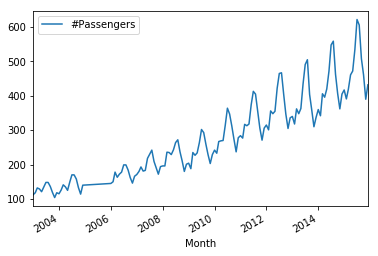

In [59]:
dataset.plot()

In [60]:
timeseries  =  dataset['#Passengers']

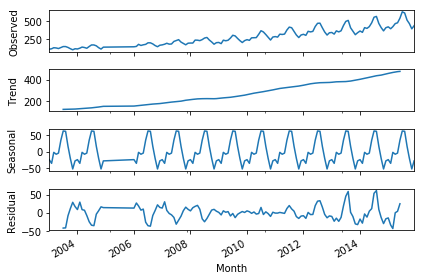

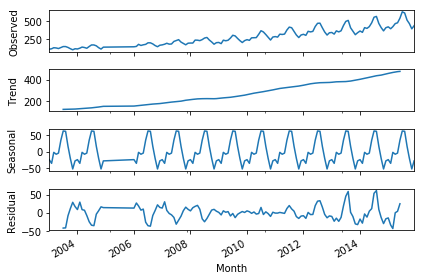

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['#Passengers'], freq=12)
decomposition.plot()

In [62]:
from statsmodels.tsa.stattools import adfuller
adfuller(dataset['#Passengers'])

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [63]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    labels = ['ADF Test Statistic', 'P-value', ' #Lags used', ' No of obs']
    
    for value, label in zip(result, labels):
        print(label + ' : '+str(value))
        
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis and my time series is stationary')
    else:
        print('weak evidence against null hypothesis and my time series is non stationary')

In [64]:
adf_check(dataset['#Passengers'])

Augmented Dickey Fuller Test
ADF Test Statistic : 0.8153688792060512
P-value : 0.991880243437641
 #Lags used : 13
 No of obs : 130
weak evidence against null hypothesis and my time series is non stationary


In [65]:
#1st diff
dataset['#Passengers First Diff'] = dataset['#Passengers'] - dataset['#Passengers'].shift(1)
adf_check(dataset['#Passengers First Diff'].dropna())
dataset.head()

Augmented Dickey Fuller Test
ADF Test Statistic : -2.8292668241699976
P-value : 0.054213290283825745
 #Lags used : 12
 No of obs : 130
weak evidence against null hypothesis and my time series is non stationary


,#Passengers,#Passengers First Diff
Month,,
2003-01-01,112,NaN
2003-02-01,118,6.0
2003-03-01,132,14.0
2003-04-01,129,-3.0
2003-05-01,121,-8.0


Augmented Dickey Fuller Test
ADF Test Statistic : -16.384231542468516
P-value : 2.7328918500141235e-29
 #Lags used : 11
 No of obs : 130
Strong evidence against null hypothesis and my time series is stationary


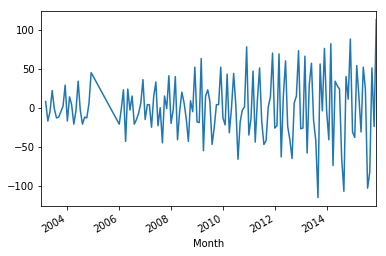

In [66]:
#2nd Diff
dataset['#Passengers Second Diff'] = dataset['#Passengers First Diff'] - dataset['#Passengers First Diff'].shift(1)
adf_check(dataset['#Passengers Second Diff'].dropna())
dataset['#Passengers Second Diff'].plot()

In [67]:
dataset.head()

,#Passengers,#Passengers First Diff,#Passengers Second Diff
Month,,,
2003-01-01,112,NaN,NaN
2003-02-01,118,6.0,NaN
2003-03-01,132,14.0,8.0
2003-04-01,129,-3.0,-17.0
2003-05-01,121,-8.0,-5.0


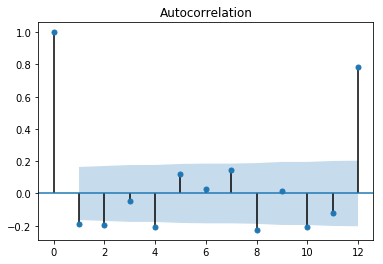

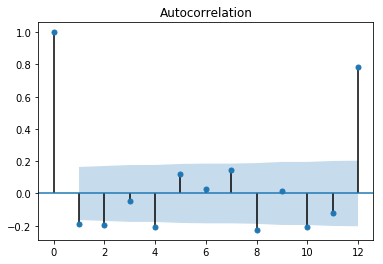

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dataset['#Passengers Second Diff'].dropna(), lags=12)
#p=0 

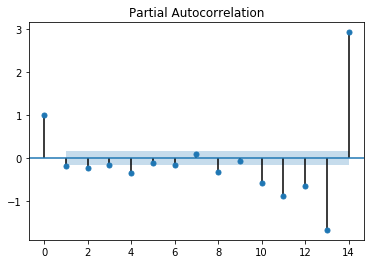

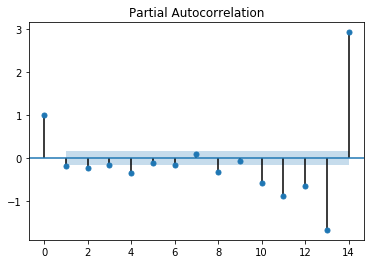

In [137]:
plot_pacf(dataset['#Passengers Second Diff'].dropna(), lags=14)
#q=0

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 2, 1, 12)   Log Likelihood                -465.483
Date:                            Wed, 17 Jul 2019   AIC                            940.967
Time:                                    14:40:16   BIC                            954.863
Sample:                                         0   HQIC                           946.610
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1183      0.244     -0.485      0.628      -0.597       0.360
ma.L1         -0.3735      0.222   

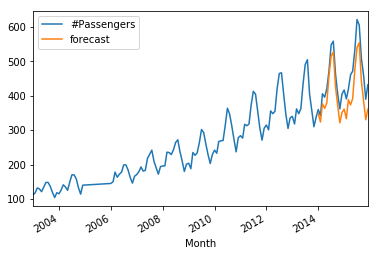

In [164]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(dataset['#Passengers'], order=(1,1,1), seasonal_order=(1,2,1,12))
results = model.fit()
dataset['forecast'] = results.predict(start= 120, end= 143, dynamic=True)
dataset[['#Passengers', 'forecast']].plot()
print(results.summary())